<a href="https://colab.research.google.com/github/Katsushi-Nakanishi/quant-macro/blob/main/HPfilter_France%26Japan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

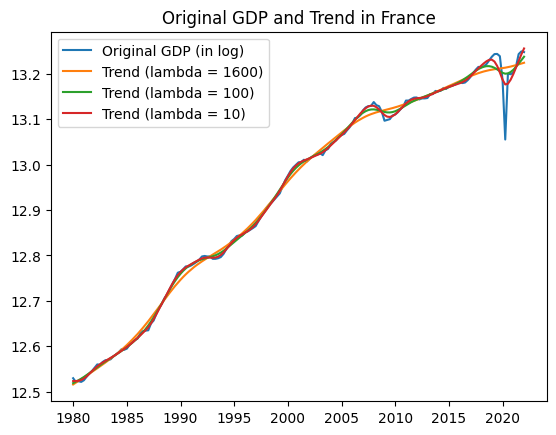

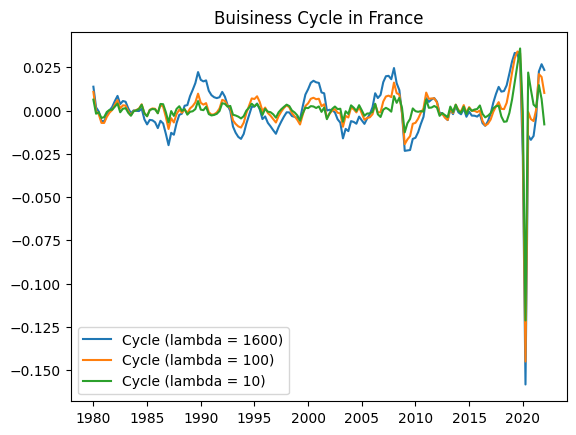

In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np

# set the start and end dates for the data
start_date = '1955-01-01'
end_date = '2022-01-01'

# download the data from FRED using pandas_datareader
gdp_france = web.DataReader('CLVMNACSCAB1GQFR', 'fred', start_date, end_date)
gdp_japan = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)
log_gdp_france = np.log(gdp_france)
log_gdp_japan = np.log(gdp_japan)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle_1600, trend_1600 = sm.tsa.filters.hpfilter(log_gdp, lamb=1600)
cycle_100, trend_100 = sm.tsa.filters.hpfilter(log_gdp, lamb=100)
cycle_10, trend_10 = sm.tsa.filters.hpfilter(log_gdp, lamb=10)


# Plot the original time series data
plt.plot(log_gdp, label="Original GDP (in log)")

# Plot the trend component
plt.plot(trend_1600, label="Trend (lambda = 1600)")
plt.plot(trend_100, label="Trend (lambda = 100)")
plt.plot(trend_10, label="Trend (lambda = 10)")


# Add a legend and show the plot
plt.legend()
plt.title('Original GDP and Trend in France')
plt.show()


plt.plot(cycle_1600, label="Cycle (lambda = 1600)")
plt.plot(cycle_100, label="Cycle (lambda = 100)")
plt.plot(cycle_10, label="Cycle (lambda = 10)")

plt.legend()
plt.title('Buisiness Cycle in France')
plt.show()